## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  21.828990  1380.631936  0.585164  3.965706   808.029479
1  69.346165  1063.043273  0.252639  6.213885   277.272605
2   9.851407  1233.896824  0.424101  5.669711   523.456957
3  26.274865  1274.574831  0.813109  9.518583  1036.711742
4  87.142342   191.678504  0.746786  5.937206   167.523726


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9596005	total: 56.8ms	remaining: 56.7s
1:	learn: 0.9485010	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9392562	total: 57.9ms	remaining: 19.3s
3:	learn: 0.9272736	total: 58.4ms	remaining: 14.6s
4:	learn: 0.9133215	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9006270	total: 59.5ms	remaining: 9.86s
6:	learn: 0.8886834	total: 59.9ms	remaining: 8.5s
7:	learn: 0.8753394	total: 60.4ms	remaining: 7.49s
8:	learn: 0.8640214	total: 60.8ms	remaining: 6.7s
9:	learn: 0.8521961	total: 61.5ms	remaining: 6.09s
10:	learn: 0.8412267	total: 62ms	remaining: 5.57s
11:	learn: 0.8276511	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8164855	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8046750	total: 63.3ms	remaining: 4.46s
14:	learn: 0.7936239	total: 63.8ms	remaining: 4.19s
15:	learn: 0.7837432	total: 64.2ms	remaining: 3.95s
16:	learn: 0.7731823	total: 64.5ms	remaining: 3.73s
17:	learn: 0.7632470	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7562538	total: 66.2ms	remaining: 3.

108:	learn: 0.2694669	total: 107ms	remaining: 873ms
109:	learn: 0.2680402	total: 107ms	remaining: 866ms
110:	learn: 0.2650574	total: 108ms	remaining: 865ms
111:	learn: 0.2628350	total: 108ms	remaining: 859ms
112:	learn: 0.2605810	total: 109ms	remaining: 854ms
113:	learn: 0.2582300	total: 109ms	remaining: 849ms
114:	learn: 0.2559426	total: 110ms	remaining: 844ms
115:	learn: 0.2534077	total: 110ms	remaining: 839ms
116:	learn: 0.2516012	total: 111ms	remaining: 834ms
117:	learn: 0.2491359	total: 111ms	remaining: 829ms
118:	learn: 0.2467380	total: 111ms	remaining: 823ms
119:	learn: 0.2450684	total: 112ms	remaining: 819ms
120:	learn: 0.2428835	total: 112ms	remaining: 813ms
121:	learn: 0.2404685	total: 112ms	remaining: 809ms
122:	learn: 0.2383373	total: 113ms	remaining: 805ms
123:	learn: 0.2358641	total: 113ms	remaining: 799ms
124:	learn: 0.2341492	total: 114ms	remaining: 795ms
125:	learn: 0.2318203	total: 114ms	remaining: 791ms
126:	learn: 0.2299445	total: 114ms	remaining: 787ms
127:	learn: 

302:	learn: 0.0904888	total: 185ms	remaining: 425ms
303:	learn: 0.0900727	total: 185ms	remaining: 424ms
304:	learn: 0.0898367	total: 186ms	remaining: 423ms
305:	learn: 0.0896032	total: 186ms	remaining: 422ms
306:	learn: 0.0893722	total: 186ms	remaining: 421ms
307:	learn: 0.0891164	total: 187ms	remaining: 420ms
308:	learn: 0.0888239	total: 187ms	remaining: 419ms
309:	learn: 0.0885888	total: 188ms	remaining: 418ms
310:	learn: 0.0883656	total: 188ms	remaining: 416ms
311:	learn: 0.0881458	total: 188ms	remaining: 415ms
312:	learn: 0.0874740	total: 189ms	remaining: 414ms
313:	learn: 0.0869752	total: 189ms	remaining: 414ms
314:	learn: 0.0867163	total: 190ms	remaining: 414ms
315:	learn: 0.0865030	total: 191ms	remaining: 413ms
316:	learn: 0.0862918	total: 191ms	remaining: 412ms
317:	learn: 0.0860715	total: 192ms	remaining: 411ms
318:	learn: 0.0857803	total: 192ms	remaining: 410ms
319:	learn: 0.0855751	total: 193ms	remaining: 410ms
320:	learn: 0.0850752	total: 193ms	remaining: 409ms
321:	learn: 

538:	learn: 0.0236659	total: 287ms	remaining: 246ms
539:	learn: 0.0235237	total: 288ms	remaining: 245ms
540:	learn: 0.0233913	total: 288ms	remaining: 244ms
541:	learn: 0.0232832	total: 288ms	remaining: 243ms
542:	learn: 0.0231413	total: 288ms	remaining: 243ms
543:	learn: 0.0230532	total: 289ms	remaining: 242ms
544:	learn: 0.0228993	total: 289ms	remaining: 241ms
545:	learn: 0.0227649	total: 289ms	remaining: 240ms
546:	learn: 0.0226617	total: 289ms	remaining: 240ms
547:	learn: 0.0225301	total: 290ms	remaining: 239ms
548:	learn: 0.0223991	total: 290ms	remaining: 238ms
549:	learn: 0.0222526	total: 290ms	remaining: 237ms
550:	learn: 0.0221251	total: 291ms	remaining: 237ms
551:	learn: 0.0220063	total: 291ms	remaining: 237ms
552:	learn: 0.0219040	total: 292ms	remaining: 236ms
553:	learn: 0.0217789	total: 292ms	remaining: 235ms
554:	learn: 0.0216791	total: 293ms	remaining: 235ms
555:	learn: 0.0215982	total: 293ms	remaining: 234ms
556:	learn: 0.0214767	total: 294ms	remaining: 234ms
557:	learn: 

627:	learn: 0.0149765	total: 329ms	remaining: 195ms
628:	learn: 0.0149086	total: 329ms	remaining: 194ms
629:	learn: 0.0148564	total: 330ms	remaining: 194ms
630:	learn: 0.0147815	total: 330ms	remaining: 193ms
631:	learn: 0.0146941	total: 331ms	remaining: 192ms
632:	learn: 0.0146355	total: 331ms	remaining: 192ms
633:	learn: 0.0145627	total: 332ms	remaining: 191ms
634:	learn: 0.0145052	total: 332ms	remaining: 191ms
635:	learn: 0.0144174	total: 333ms	remaining: 191ms
636:	learn: 0.0143531	total: 334ms	remaining: 190ms
637:	learn: 0.0142905	total: 334ms	remaining: 190ms
638:	learn: 0.0142377	total: 335ms	remaining: 189ms
639:	learn: 0.0141840	total: 335ms	remaining: 188ms
640:	learn: 0.0141330	total: 335ms	remaining: 188ms
641:	learn: 0.0140836	total: 336ms	remaining: 187ms
642:	learn: 0.0140320	total: 336ms	remaining: 187ms
643:	learn: 0.0139831	total: 336ms	remaining: 186ms
644:	learn: 0.0139163	total: 337ms	remaining: 185ms
645:	learn: 0.0138690	total: 338ms	remaining: 185ms
646:	learn: 

868:	learn: 0.0062605	total: 431ms	remaining: 65ms
869:	learn: 0.0062316	total: 432ms	remaining: 64.5ms
870:	learn: 0.0062075	total: 432ms	remaining: 64ms
871:	learn: 0.0061792	total: 433ms	remaining: 63.5ms
872:	learn: 0.0061557	total: 433ms	remaining: 63ms
873:	learn: 0.0061342	total: 434ms	remaining: 62.5ms
874:	learn: 0.0061065	total: 434ms	remaining: 62ms
875:	learn: 0.0060855	total: 434ms	remaining: 61.5ms
876:	learn: 0.0060581	total: 435ms	remaining: 61ms
877:	learn: 0.0060375	total: 435ms	remaining: 60.5ms
878:	learn: 0.0060106	total: 436ms	remaining: 60ms
879:	learn: 0.0059881	total: 436ms	remaining: 59.5ms
880:	learn: 0.0059617	total: 437ms	remaining: 59ms
881:	learn: 0.0059417	total: 437ms	remaining: 58.5ms
882:	learn: 0.0059157	total: 438ms	remaining: 58ms
883:	learn: 0.0058940	total: 438ms	remaining: 57.5ms
884:	learn: 0.0058745	total: 438ms	remaining: 57ms
885:	learn: 0.0058485	total: 439ms	remaining: 56.4ms
886:	learn: 0.0058294	total: 439ms	remaining: 55.9ms
887:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

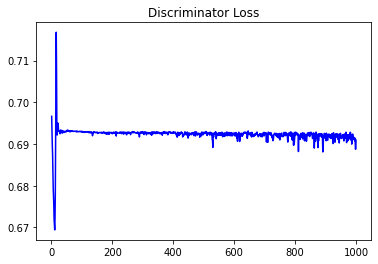

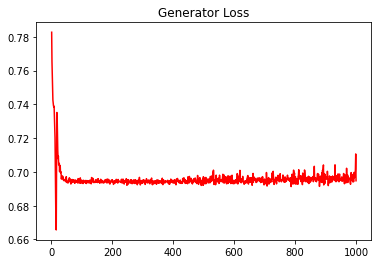

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01142034230641829


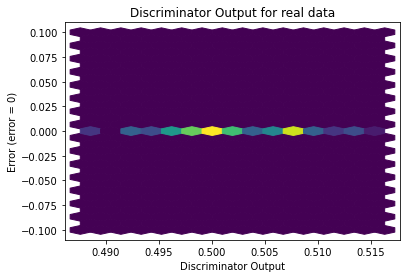

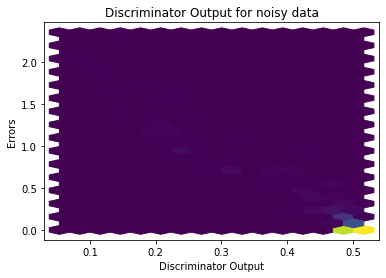

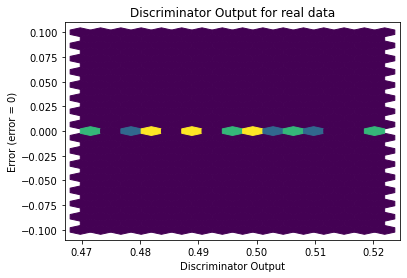

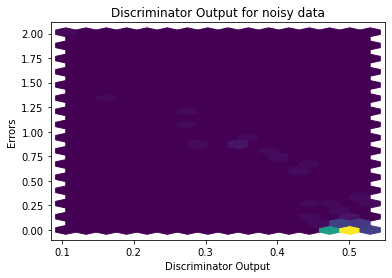

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


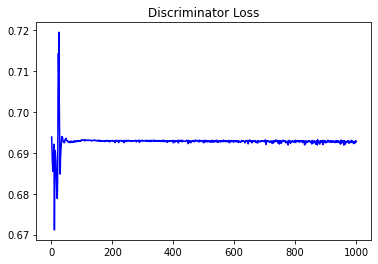

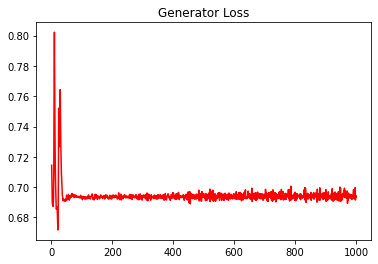

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04222414581669047


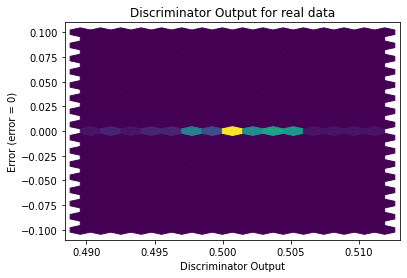

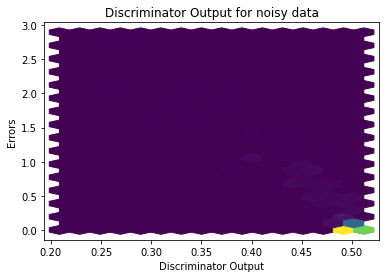

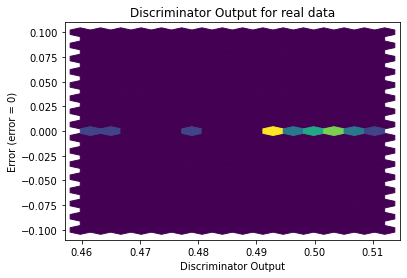

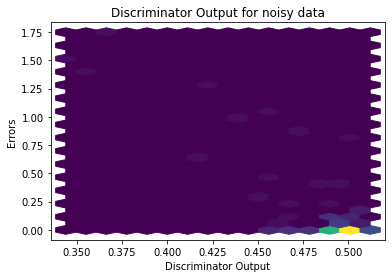

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6217]], requires_grad=True)
